<h1 align='center'>Uso de XGBoost para problemas de clasificación<h1>
    
<h2 align='center'>Laura G Funderburk</h2>
    
<h2 align='center'>Liga: https://tinyurl.com/xgboost-charla<h2>
    
| | | |
|-|-|-|
|<img  src='pandas.png' width=80%>|<img  src='sklearn.png' width=80%>| <img  src='XGBoost_logo.png' width=100%>| 

<h2 align='center'>Sobre mí</h2>

<center><img src='2-radar-chart.gif' width=20%/></center>

➕ Completé la Licenciatura en Matemáticas en Simon Fraser University, Canadá

📈 🤗 Científica de datos, Developer Advocate @Ploomber

🇲🇽 🇬🇧 🇩🇪 🇨🇦 Nací en México, y ahora vivo en Canadá

🥋🇧🇷 Practico Jiu-jitsu Brasileño

<h2 align='center'>Conecta conmigo</h2>

🖥️ Sitio web: https://lfunderburk.github.io/

🐙 GitHub: https://github.com/lfunderburk

🐦 Twitter: @lgfunderburk

🦣 Mastodon: https://fosstodon.org/@lfunderburk

<h2 align='center'>Introducción</h2>

1. ¿Qué es la clasificación?
2. Diferencia entre clasificación y regresión
3. Introducción a XGBoost

<h2 align='center'>Qué es la clasificación</h2>




<h2 align='center'>Clasificación vs Regresión</h2>

1. Clasificación: predecir una etiqueta categórica (ej. si es spam o no es spam)
2. Regresión: predecir un valor numérico continuo (ej. el precio de bienes raices)

<h2 align='center'>XGBoost</h2>


- Basado en algoritmo de Gradient Boosting
- Escalable y eficiente
- Ampliamente utilizado en competencias de aprendizaje automático


<h2 align='center'>Instalación de XGBoost</h2>


```
pip install xgboost
```

<h2 align='center'>Importando bibliotecas</h2>


In [13]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, \
                            classification_report, \
                            accuracy_score,\
                            balanced_accuracy_score,\
                            ConfusionMatrixDisplay

import pandas as pd

<h2 align='center'>Cargando y dividiendo el conjunto de datos</h2>


- **Conjunto de datos "Calidad del Vino"**: propiedades fisicoquímicas de vinos, como acidez, contenido de azúcar y alcohol. 

- **Objetivo**: predecir la calidad del vino usando estas características. 

- **Problema de clasificación binaria (buena o mala calidad)**.

Este conjunto de datos está disponible en el Repositorio de Aprendizaje Automático de UCI.

https://archive.ics.uci.edu/ml/datasets/wine+quality


<h2 align='center'>Procedimiento</h2>

1. Lee los datos

2. Elije threshold

3. Separa los datos

4. Inicializa el modelo

5. Ajusta el modelo

6. Usa el modelo

7. Evalua el modelo

In [14]:
# Carga el conjunto de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Preprocesamiento: convierta la columna de calidad en un problema de clasificación binaria (bueno o malo)
threshold = 6
df['quality'] = (df['quality'] >= threshold).astype(int)

# Dividir el conjunto de datos en características (X) y objetivo (y)
X = df.drop('quality', axis=1)
y = df['quality']

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [15]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

<h2 align='center'>Entrenamiento del modelo</h2>


In [17]:
# Inicializa el modelo
modelo_xgb = xgb.XGBClassifier()

# Ajustar el modelo
modelo_xgb.fit(X_train, y_train)

# Usa el modelo para predecir
y_pred = modelo_xgb.predict(X_test)

<h2 align='center'>Evaluación del modelo</h2>


score for training set 1.0 score for testing set 0.8
Balanced accuracy score 0.797892151036095 Accuracy 0.8


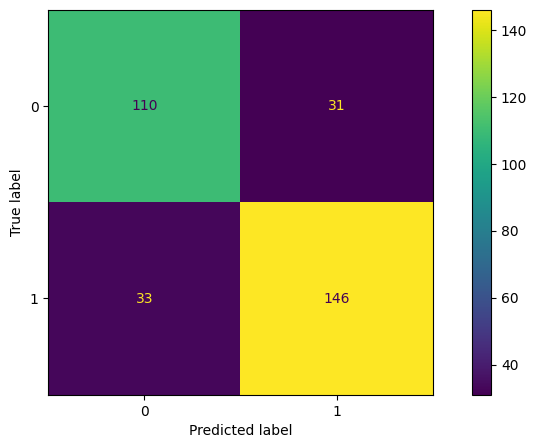

In [18]:
def evalua_modelo(modelo):
    score_train = modelo.score(X_train, y_train)
    score_test = modelo.score(X_test, y_test)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print('score for training set', score_train, 'score for testing set', score_test)
    print("Balanced accuracy score", balanced_accuracy,"Accuracy",accuracy)
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax);
    
evalua_modelo(modelo_xgb)

<h2 align='center'>Hiperparámetros</h2>

- `learning_rate`
- `max_depth`
- `n_estimators`
- `subsample`
- `colsample_bytree`

In [19]:
# Definiendo hiperparámetros personalizados
hiperparametros = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Entrenamiento del modelo con hiperparámetros personalizados
modelo_xgb_h = xgb.XGBClassifier(**hiperparametros)
modelo_xgb_h.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

score for training set 0.8569194683346364 score for testing set 0.771875
Balanced accuracy score 0.797892151036095 Accuracy 0.8


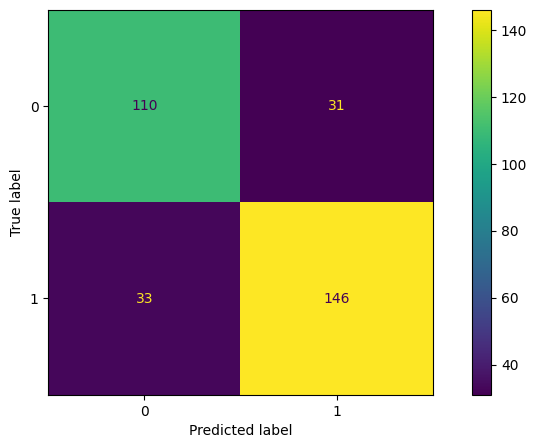

In [20]:
# Observar resultados
evalua_modelo(modelo_xgb_h)

<h2 align='center'>Ajuste de hiperparámetros</h2>

- Búsqueda de cuadrícula
- Búsqueda aleatoria
- Validación cruzada

In [21]:
# Hyperparameters ranges
hyperparameters_ranges = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': list(range(3, 15)),  
    'n_estimators': [50, 100, 200, 500, 1000],  
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Create XGBoost classifier
modelo_xgb = xgb.XGBClassifier()

# Perform randomized search
random_search = RandomizedSearchCV(modelo_xgb, 
                                   param_distributions=hyperparameters_ranges, 
                                   n_iter=25, 
                                   cv=5, 
                                   random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_hyperparameters = random_search.best_params_
print(f"Best hyperparameters: {best_hyperparameters}")

Best hyperparameters: {'subsample': 0.9, 'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


score for training set 1.0 score for testing set 0.80625
Balanced accuracy score 0.8004675304092872 Accuracy 0.80625


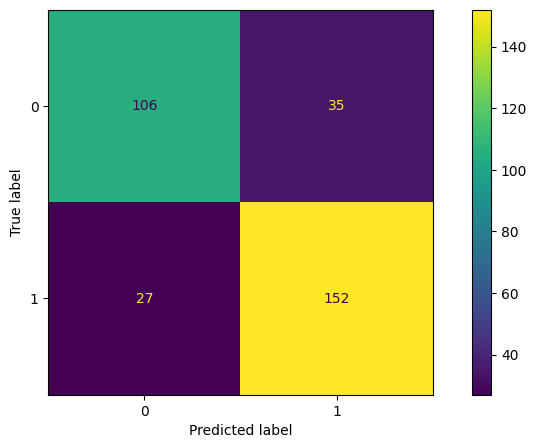

In [23]:
# Train the model with the best hyperparameters
modelo_xgb_h_b = xgb.XGBClassifier(**best_hyperparameters)
modelo_xgb_h_b.fit(X_train, y_train)

# Evaluate the model
y_pred = modelo_xgb_h_b.predict(X_test)

evalua_modelo(modelo_xgb_h_b)

<h2 align='center'>Importancia de las características</h2>

- Ganancia
- Frecuencia
- Cobertura

<h2 align='center'>Visualización de la importancia de las características</h2>

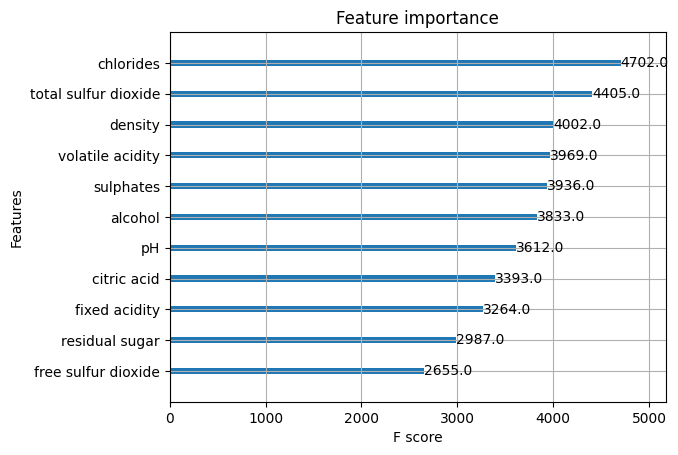

In [24]:
xgb.plot_importance(modelo_xgb_h_b)
plt.show()

<h2 align='center'>Ventajas de XGBoost</h2>

- Rendimiento superior
- Manejo de valores faltantes
- Paralelización
- Regularización
- Flexibilidad

<h2 align='center'>Conclusión</h2>

- XGBoost: eficiente y potente para clasificación
- Ajuste de hiperparámetros y selección de características
- Ventajas clave de XGBoost

<h2 align='center'>Conecta conmigo</h2>

🖥️ Sitio web: https://lfunderburk.github.io/

🐙 GitHub: https://github.com/lfunderburk

🐦 Twitter: @lgfunderburk

🦣 Mastodon: https://fosstodon.org/@lfunderburk